In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Задание 1

---

Напишите функцию linan(), которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.


Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [ ]:
def linan():
  a11, a12, b1 = [int(x) for x in input("Введите коэффициенты первого уравнения: ").split()]
  a21, a22, b2 = [int(x) for x in input("Введите коэффициенты второго уравнения: ").split()]
  print()

  d = a11 * a22 - a12 * a21
  if d != 0:
    dx = b1 * a22 - a12 * b2
    dy = a11 * b2 - b1 * a21
    print(round(dx / d, 3), round(dy / d, 3))
  else:
    print("Нет решений!")


linan()

Введите коэффициенты первого уравнения: 1 2 3
Введите коэффициенты второго уравнения: 4 5 6

-1.0 2.0


# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый результат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



Обратите внимание, что ожидается массив numpy

In [ ]:
def decorate_matrix(n: int):
  matrix = np.ones((n, n), dtype=int)
  matrix[1: n - 1, 1: n - 1] = 0
  return matrix


print(decorate_matrix(int(input("Введите размер матрицы:  "))))

Введите размер матрицы:  5
[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]


# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример.
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [ ]:
def f(x, a, b):
  return (x + a) ** 2 - b

def g(x, a, b):
  return abs(f(x, a, b))

In [ ]:
def golden_ration_minimize(f, a, b):
    l, r = (-a - 0.1, -a + 15)

    x1 = l + 0.381966011*(r - l)
    x2 = l + 0.618033989*(r - l)
    f1 = f(x1, a, b)
    f2 = f(x2, a, b)

    while r - l > 0.000000001:
        if f1 >= f2:
            y_min = f2
            l = x1
            x1 = x2
            x2 = l + (r - x2)
            f1 = f2
            f2 = f(x2, a, b)
        else:
            y_min = f1
            r = x2
            x2 = x1
            x1 = r - (x1 - l)
            f2 = f1
            f1 = f(x1, a, b)

    return round((l + r) / 2, 4), round(y_min, 4)

In [ ]:
a, b = (int(x) for x in input("Введите параметры a и b через пробел:  ").split())

x_for_f, y_for_f = golden_ration_minimize(f, a, b)
x_for_g, y_for_g = golden_ration_minimize(g, a, b)

print(f"\nПри x = {x_for_f} достигается минимум ф-ции f(x)")

if y_for_f >= 0:
  print(f"При x = {x_for_g} достигается минимум ф-ции g(x)")
else:
  second_x_for_g = 2*x_for_f - x_for_g
  print(f"При x = {second_x_for_g} и x = {x_for_g} достигается минимум ф-ции g(x)")

Введите параметры a и b через пробел:  3 4

При x = -3.0004 достигается минимум ф-ции f(x)
При x = -5.0013 и x = -0.9995 достигается минимум ф-ции g(x)


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

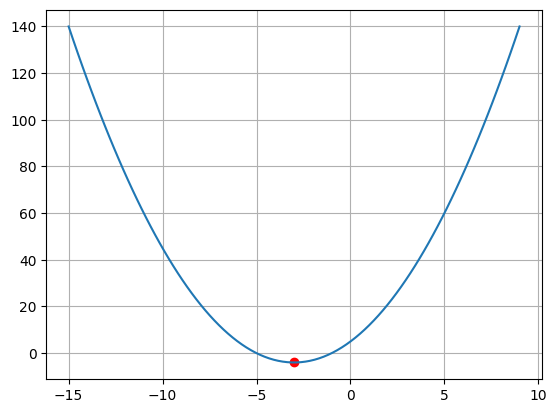

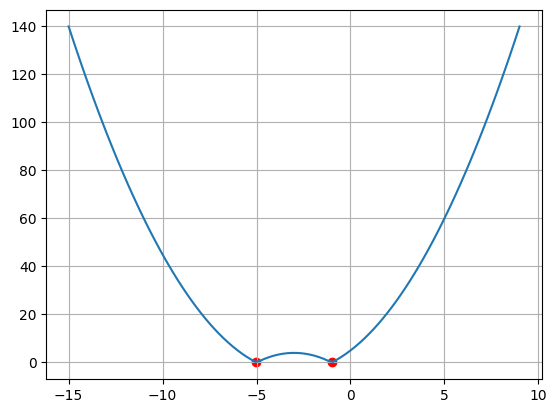

In [ ]:
x_for_graph = np.linspace(-a - 12, -a + 12, 100)

plt.plot(x_for_graph, f(x_for_graph, a, b), label='f(x)')
plt.scatter(x_for_f, y_for_f, c='r')
plt.grid()
plt.show()

plt.plot(x_for_graph, g(x_for_graph, a, b), label='f(x)')
plt.scatter(x_for_g, y_for_g, c='r')
if x_for_f != x_for_g:
  plt.scatter(second_x_for_g, y_for_g, c='r')
plt.grid()
plt.show()

plt.show()